In [37]:
import numpy as np
import pandas as pd 
import obspy
import creep_event_picker as cep
import datetime as dt
import matplotlib.pyplot as plt
import inflect
stringify = inflect.engine()
import math
import os
import raw_to_obspy as rto
from os import listdir
from os.path import isfile, join
import importlib
import fnmatch

Igor time to datetime

In [38]:
from datetime import datetime, timedelta

def igor_seconds_to_datetime(igor_seconds):
    """Converts Igor Pro seconds (since Jan 1, 1904) to a standard datetime object."""
    igor_epoch = datetime(1904, 1, 1)  # Igor Pro epoch
    return igor_epoch + timedelta(seconds=igor_seconds)

USGS to CSV

In [ ]:
def find_files_with_wildcard(pattern, search_path):
    matching_files = []
    for root, dirs, files in os.walk(search_path):
        for file in files:
            if fnmatch.fnmatch(file, pattern):  # Use wildcard pattern matching
                matching_files.append(os.path.join(root, file))
    
    return matching_files

def import_USGS_Data(path):
    ''' import text file for creepmeter data
    input         path: path to data
    return          tm: time for data
    return min10_creep: slip for data'''

    vls = np.loadtxt(path, dtype = str)
    Year  = vls[:,0].astype(int)
    Time  = vls[:,1].astype(float)
    creep  = vls[:,2].astype(float)
    tm =np.array([dt.datetime(Year[k],1,1) + dt.timedelta(days = Time[k] -1) for k in range (0, len(Year))])
    df = pd.DataFrame({'Time':tm,'Slip':creep})
    return df

In [ ]:
station = input('Please enter the station abbreviation')
network = 'Central_San_Andreas_Fault'#input('Please enter the network')
#Location_name = input('Please enter location name')

path = '../../Data/{k}/Raw/'.format(k=network)
file_to_add = find_files_with_wildcard(station+'*',path)[0]

data_source = input('Data recording type? Manual vs 10 min')
if data_source == 'm':
    print('Importing USGS File')
    df = import_USGS_Data(file_to_add)
    df.to_csv('../../Data/{k}/CSV/{p}_man.csv'.format(k=network,p=station[0:3]))
elif data_source == 'd':
    print('Importing USGS File')
    df = import_USGS_Data(file_to_add)
    df.to_csv('../../Data/{k}/CSV/{p}_day.csv'.format(k=network,p=station[0:3]))
else:
    print('Importing USGS File')
    df = import_USGS_Data(file_to_add)
    df.to_csv('../../Data/{k}/CSV/{p}.csv'.format(k=network,p=station[0:3]))
print(df)

Creating CSV areas

In [ ]:
test_2 = pd.read_csv("../../../Data/Southern_San_Andreas_Fault/Ross_Road_Imperial_to_2022.txt")

In [ ]:
test_2

In [ ]:
test_2.drop(['coRRC'],axis=1)

In [ ]:
rr_23 = pd.read_csv('../../Data/Southern_San_Andreas_Fault/Raw/Ross_road_2022_2023.txt')
rr_23.rename(columns = {'SoCalDate':'Date','RR':'Slip'},inplace=True)
rr_to_22 = pd.read_csv('../../Data/Southern_San_Andreas_Fault/Raw/Ross_Road_Imperial_to_2022.txt')
rr_to_22.rename(columns={'coRRDAY':'Date','coRR':'Slip'},inplace=True)
#rr_to_22.drop(['coRRC'], axis=1,inplace=True)

Ross_road=pd.concat([rr_to_22,rr_23],ignore_index=True)
Ross_road

In [ ]:
neg_1 = np.linspace(41200,41211,12)
neg_1

In [ ]:
Ross_road.drop(neg_1,inplace=True)

In [ ]:
neg_2 = np.linspace(168360,168395,36)
neg_2

In [ ]:
Ross_road.drop(neg_2,inplace=True)
Ross_road.reset_index(drop=True,inplace=True)
Ross_road

In [ ]:
Ross_road['Date'] = pd.to_datetime(Ross_road['Date'])

In [ ]:
df_rr = pd.DataFrame({'Date':Ross_road['Date'],'Slip':Ross_road['Slip']})
df_rr_T = pd.DataFrame({'Date':Ross_road['Date'],'degC':Ross_road['coRRC']})
df_rr_T.dropna(inplace=True)
df_rr_T.reset_index(inplace=True,drop=True)

df_rr.to_csv(("../../Data/DATA_tidied/CSV/rr45.csv"))
df_rr_T.to_csv(("../../Data/DATA_tidied/CSV/Ross_Road_Temp.csv"))


In [ ]:
Ross_road.to_csv('../../../Data/Southern_San_Andreas_Fault/CSV/rr.csv')

In [ ]:
Ross_road

Superstition Hills

In [ ]:
sh_23 = pd.read_csv('../../Data/Southern_San_Andreas_Fault/Raw/Superstition_to_Oct_2023.txt')
sh_23.rename(columns={'newSUtime':'Date','newSUmm1':'Slip','newSUC':'TempC'},inplace=True)
sh_23.Date = pd.to_datetime(sh_23.Date)
sh_23.to_csv('../../Data/Southern_San_Andreas_Fault/CSV/sup2.csv')

In [ ]:
sh_04_19 = pd.read_csv('../../Data/Southern_San_Andreas_Fault/Raw/Superstition-2004_2019.txt')
sh_04_19.rename(columns={'SHday':'Date','SHmm':'Slip','SHT':'TempC'},inplace=True)
sh_04_19.Date = pd.to_datetime(sh_04_19.Date)
plt.figure()
plt.plot(sh_04_19.Date,sh_04_19.Slip)
plt.show()
sh_04_19.to_csv('../../Data/Southern_San_Andreas_Fault/CSV/sup1.csv')

In [ ]:
sh_combo  = pd.concat([sh_04_19,sh_23])

In [ ]:
sh_combo.reset_index(inplace=True, drop=True)

In [ ]:
#sh_combo.drop_duplicates(subset='Date',inplace=True)
#sh_combo.reset_index(inplace=True)
#sh_combo.to_csv('../../../Data/Southern_San_Andreas_Fault/CSV/sup.csv')

In [ ]:
neg = np.arange(67528,67681)
neg_2 = np.arange(140203,140215)
neg_3 = np.arange(238215,238221)
neg_4 = np.array([317605])
neg_6 = np.arange(584250,627741)
neg_7 = np.arange(2812226,2812256)
neg  =np.append(neg,neg_2)
neg  =np.append(neg,neg_3)
neg  =np.append(neg,neg_4)
neg  =np.append(neg,neg_6)
neg  =np.append(neg,neg_7)
neg

In [ ]:
sh_combo.iloc[67528:67681]

In [ ]:
sh_combo.iloc[140203:140215]

In [ ]:
sh_combo.iloc[238215:238221]

In [ ]:
sh_combo.iloc[317605]

In [ ]:
sh_combo.iloc[584250:627741]

In [ ]:
sh_combo.iloc[2812226:2812256]

In [ ]:
sh_combo.drop(neg,inplace=True)
sh_combo.reset_index(inplace=True,drop=True)

In [ ]:
sh_combo.iloc[503020:503024]
sh_combo.drop([503021],inplace=True)
sh_combo.reset_index(inplace=True,drop=True)

In [ ]:
df_su = pd.DataFrame({'Date':sh_combo['Date'],'Slip':sh_combo['Slip']})
df_su_T = pd.DataFrame({'Date':sh_combo['Date'],'degC':sh_combo['TempC']})
df_su_T.dropna(inplace=True)
df_su_T.reset_index(inplace=True,drop=True)

df_su.to_csv(("../../Data/DATA_tidied/CSV/su30.csv"))
df_su_T.to_csv(("../../Data/DATA_tidied/CSV/Temperature/Superstition_Hills_Temp.csv"))

In [ ]:
plt.figure()
plt.plot(sh_combo.Date,sh_combo.Slip)
plt.show()

In [ ]:
durmid = pd.read_csv('../../Data/Southern_San_Andreas_Fault/Raw/DU30_edit.txt')

In [ ]:
durmid

In [ ]:
# Find rows where 'col1' is an empty string
empty_string_rows = durmid[durmid['Durmid\\'] == ''].index

print("Indices with empty strings in 'col1':", empty_string_rows.tolist())

In [ ]:
for i in range(len(durmid)):
    try:
        durmid['Durmid\\'].iloc[i] = float(str(durmid['Durmid\\'].iloc[i])[:-1])
    except ValueError:
        print(durmid.loc[i])

In [ ]:
durmid['Durmid\\'] = durmid['Durmid\\'].apply(lambda x: float(str(x)[:-1]) if str(x)[:-1] else float('nan'))


In [ ]:
durmid.rename(columns={'SoCalDate':'Date','Durmid\\':'Slip'},inplace=True)
durmid.Date = pd.to_datetime(durmid.Date)
durmid.drop_duplicates(['Date'],inplace=True)
durmid.reset_index(inplace=True,drop=True)
durmid.to_csv('../../Data/Southern_San_Andreas_Fault/CSV/du30.csv')
durmid

In [ ]:
#wsz = pd.read_csv("../../../Data/North_Anatolian_Fault/CSV/wsz.csv",names=['Date','Slip'])
wsz.to_csv("../../../Data/North_Anatolian_Fault/CSV/wsz.csv")

In [ ]:
#wsz.reset_index(inplace=True)
#wsz.drop([0,1],inplace=True)
#wsz.drop(['level_0','index'],axis=1,inplace=True)
#wsz.reset_index(inplace=True)
wsz.drop(['index'],axis=1,inplace=True)
wsz

In [ ]:
inw = pd.read_csv("../../Data/North_Anatolian_Fault/RAW/Ismetpasa North Wall 2004-2023.txt")
inw

In [ ]:
inw.rename(columns={'northday':'Date','northamm':'Slip'},inplace=True)

In [ ]:
inw.to_csv("../../../Data/North_Anatolian_Fault/CSV/inw.csv")

In [ ]:
isw = pd.read_csv("../../Data/North_Anatolian_Fault/RAW/South_wall_longer.txt", delimiter='\t')
isw

In [ ]:
isw.rename(columns={'IsmetpasSouthDay':'Date','IsmetpasaSouthDextral':'Slip'},inplace=True)

In [ ]:
isw.drop(['IsmetpasaSouth1'],axis=1,inplace=True)

In [ ]:
isw.to_csv("../../Data/North_Anatolian_Fault/CSV/isw.csv")

In [ ]:
cha = pd.read_csv("../../../Data/Chaman_Fault/RAW/Chaman creep event 2019 _ hourly data.txt")

In [ ]:
cha.rename(columns={'chamanDay':'Date','mm':'Slip'},inplace=True)
cha.to_csv("../../../Data/Chaman_Fault/CSV/cha.csv")

In [ ]:
fc = pd.read_csv("../../Data/Central_San_Andreas_Fault/Raw/FoxCreekSouth to March 2024.txt")

fc['FoxSouthDAY'] = pd.to_datetime(fc['FoxSouthDAY'])
df_fox = pd.DataFrame({'Date':fc['FoxSouthDAY'],'Slip':fc['FoxSouthOblique']})
df_fox_T = pd.DataFrame({'Date':fc['FoxSouthDAY'],'degC':fc['FoxSouthdegC']})
df_fox_O = pd.DataFrame({'Date':fc['FoxSouthDAY'],'Ortho':fc['FoxSouthNormal']})

df_fox.to_csv(("../../Data/Central_San_Andreas_Fault/CSV/fxc1.csv"))
df_fox_T.to_csv(("../../Data/Central_San_Andreas_Fault/CSV/FoxCreek_Temp.csv"))
df_fox_O.to_csv(("../../Data/Central_San_Andreas_Fault/CSV/FoxCreek_Orthogonal.csv"))

In [ ]:
pan = pd.read_csv("../../Data/East_Anatolian_Fault/Raw/PaluNorth.txt",delimiter='\t')
print(pan)
pan['northday'] = pd.to_datetime(pan['northday'],dayfirst=True)
df_pan = pd.DataFrame({'Date':pan['northday'],'Slip':pan['northmm']})
df_pan_T = pd.DataFrame({'Date':pan['northday'],'degC':pan['northC']})
df_pan_V = pd.DataFrame({'Date':pan['northday'],'Volts':pan['northV']})
df_pan_V.dropna(inplace=True)
df_pan_V.reset_index(inplace=True,drop=True)

plt.figure()
plt.plot(df_pan['Date'],df_pan['Slip'])
plt.show()

df_pan.to_csv(("../../Data/East_Anatolian_Fault/CSV/pan1.csv"))
df_pan_T.to_csv(("../../Data/East_Anatolian_Fault/CSV/PaluNorth_Temp.csv"))
df_pan_V.to_csv(("../../Data/East_Anatolian_Fault/CSV/PaluNorth_Voltage.csv"))


In [ ]:
pan

In [ ]:
pas = pd.read_csv("../../Data/East_Anatolian_Fault/Raw/PaluSouth.txt",delimiter='\t')
pas['southday'] = pd.to_datetime(pas['southday'],dayfirst=True)
df_pas = pd.DataFrame({'Date':pas['southday'],'Slip':pas['Southmm']})
df_pas_T = pd.DataFrame({'Date':pas['southday'],'degC':pas['southC']})
df_pas_V = pd.DataFrame({'Date':pas['southday'],'Volts':pas['southv']})
df_pas_V.dropna(inplace=True)
df_pas_V.reset_index(inplace=True,drop=True)
df_pas.dropna(inplace=True)
df_pas.reset_index(inplace=True,drop=True)


plt.figure()
plt.plot(df_pas['Date'],df_pas['Slip'])
plt.show()

df_pas.to_csv(("../../Data/East_Anatolian_Fault/CSV/pas1.csv"))
df_pas_T.to_csv(("../../Data/East_Anatolian_Fault/CSV/PaluSouth_Temp.csv"))
df_pas_V.to_csv(("../../Data/East_Anatolian_Fault/CSV/PaluSouth_Voltage.csv"))
pas

In [ ]:
west_sazlik = pd.read_csv("../../Data/North_Anatolian_Fault/CSV/Old/Sazlik_file_test.csv")

In [ ]:
west_sazlik['Time'] = pd.to_datetime(west_sazlik['Time'])
west_sazlik['diff'] = west_sazlik['2019_event_excel'] - west_sazlik['Igor_sazlik_excel']
west_sazlik

In [ ]:
%matplotlib qt
fig = plt.figure()
ax1= plt.subplot(2,1,1)
plt.plot(west_sazlik['Time'],west_sazlik['2019_event_excel'])
plt.plot(west_sazlik['Time'],west_sazlik['Igor_sazlik_excel']+19.87)
ax2 = plt.subplot(2,1,2,sharex=ax1)
plt.plot(west_sazlik['Time'],west_sazlik['diff'])
fig.set_size_inches(15,5)
plt.show()

Sazlik

In [ ]:
dfs = pd.read_excel('../../Data/North_Anatolian_Fault/Raw/Sazlik2017-2023.xlsx', sheet_name=[0,1,2,3,4])

In [ ]:
dfs[0].rename(columns = {'sazlik west':'Slip W','date time':'Date','SazlikEast':'Slip E'},inplace=True)
dfs[1].rename(columns = {'WSazlikmm':'Slip W','date time':'Date','EastSazlickmm':'Slip E'},inplace=True)
dfs[2].rename(columns = {'WSazlikmm':'Slip W','date time':'Date','EastSazlickmm':'Slip E'},inplace=True)
dfs[3].rename(columns = {'mm':'Slip W','datetimeWSazlik':'Date'},inplace=True)

In [ ]:
all_sheets_df = pd.concat(dfs.values())

In [ ]:
all_sheets_df.reset_index(inplace=True,drop=True)
all_sheets_df

In [ ]:
west_sazlik = pd.DataFrame({'Date':all_sheets_df['Date'],'Slip':all_sheets_df['Slip W']})
west_sazlik.dropna(inplace=True)
west_sazlik.reset_index(inplace=True,drop=True)
west_sazlik.to_csv("../../Data/North_Anatolian_Fault/CSV/wsz1.csv")

In [ ]:
east_sazlik = pd.DataFrame({'Date':all_sheets_df['Date'],'Slip':all_sheets_df['Slip E']})
east_sazlik.dropna(inplace=True)
east_sazlik.reset_index(inplace=True,drop=True)
east_sazlik.to_csv("../../Data/North_Anatolian_Fault/CSV/esz1.csv")

In [ ]:
west_sazlik = pd.DataFrame({'Date':all_sheets_df['Date'],'IR':all_sheets_df['WSazlikIR']})
west_sazlik.dropna(inplace=True)
west_sazlik.reset_index(inplace=True,drop=True)
west_sazlik.to_csv("../../Data/North_Anatolian_Fault/CSV/wsz_IR.csv")

In [ ]:
west_sazlik = pd.DataFrame({'Date':all_sheets_df['Date'],'degC':all_sheets_df['degC']})
west_sazlik.dropna(inplace=True)
west_sazlik.reset_index(inplace=True,drop=True)
west_sazlik.to_csv("../../Data/North_Anatolian_Fault/CSV/Sazlik_Temp.csv")

Hamamli

In [ ]:
df = pd.read_csv('../../Data/North_Anatolian_Fault/CSV/Old/Hamamli_23AUG2019_20JAN2020.csv',header=None)

In [ ]:
df.rename(columns = {0:'Date',1:'Slip'},inplace=True)
df.to_csv("../../Data/North_Anatolian_Fault/CSV/ham1.csv")

Cherry

In [ ]:
df1 = pd.read_csv('../../Data/North_Anatolian_Fault/CSV/Old/CherryPt1.csv')

In [ ]:
df1['cherryday'] = pd.to_datetime(df1['cherryday'],dayfirst=True)
df1.rename(columns = {'cherryday':'Date','cherrymm':'Slip'},inplace=True)
df1

In [ ]:
df2 = pd.read_csv('../../Data/North_Anatolian_Fault/CSV/Old/Cherry_09OCT2019_08FEB2020.csv',header=None)
df2.rename(columns = {0:'Date',1:'Slip'},inplace=True)
df2['Date']=pd.to_datetime(df2['Date'])

plt.figure()
plt.plot(df2['Date'],df2['Slip'])
plt.show()

In [ ]:
df_all = pd.concat([df1,df2])
df_all

In [ ]:
plt.figure()
plt.plot(df_all['Date'],df_all['Slip'])
plt.plot(df_all['Date'],df_all['cherryC'])
plt.show()

In [ ]:
df_cherry_T = pd.DataFrame({'Date':df_all['Date'],'degC':df_all['cherryC']})
df_cherry_T.dropna(inplace=True)
df_cherry_T.reset_index(inplace=True,drop=True)
df_cherry_T.to_csv("../../Data/North_Anatolian_Fault/CSV/Cherry_Temp.csv")

In [ ]:
df_cherry = pd.DataFrame({'Date':df_all['Date'],'Slip':df_all['Slip']})
df_cherry.dropna(inplace=True)
df_cherry.reset_index(inplace=True,drop=True)
df_cherry.to_csv("../../Data/North_Anatolian_Fault/CSV/che1.csv")

In [ ]:
df_cherry_new = pd.read_csv('../../Data/North_Anatolian_Fault/Raw/CherryDextral_May2017_May2020.txt')
df_cherry_new['CherryDay'] = pd.to_datetime(df_cherry_new['CherryDay'])
df_cherry_new

In [ ]:
plt.figure()
plt.plot(df_all['Date'],df_all['Slip'])
plt.plot(df_cherry_new['CherryDay'],df_cherry_new['CherryDextral'])
plt.show()

In [ ]:
df_cherry = pd.DataFrame({'Date':df_cherry_new['CherryDay'],'Slip':df_cherry_new['CherryDextral']})
df_cherry.dropna(inplace=True)
df_cherry.reset_index(inplace=True,drop=True)
df_cherry.to_csv("../../Data/North_Anatolian_Fault/CSV/che1.csv")

In [ ]:
df_cherry_T = pd.DataFrame({'Date':df_cherry_new['CherryDay'],'degC':df_cherry_new['CherryDegC']})
df_cherry_T.dropna(inplace=True)
df_cherry_T.reset_index(inplace=True,drop=True)
df_cherry_T.to_csv("../../Data/North_Anatolian_Fault/CSV/Cherry_Temp.csv")

In [ ]:
inw = pd.read_csv('../../Data/North_Anatolian_Fault/Raw/NorthWall.txt',delimiter='\t')
inw.rename(columns = {'northday':'Date','northamm':'Slip'},inplace=True)
inw['Date'] = pd.to_datetime(inw['Date'],dayfirst=True)
inw.to_csv("../../Data/North_Anatolian_Fault/CSV/inw1.csv")
inw

In [ ]:
isw = pd.read_csv('../../Data/North_Anatolian_Fault/Raw/SouthWall.txt',delimiter='\t')
isw

In [ ]:
df_isw = pd.DataFrame({'Date':isw['IsmetpasSouthDay'],'Slip':isw['IsmetpasaSouthDextral']})
df_isw['Date'] = pd.to_datetime(df_isw['Date'],dayfirst=True)
df_isw.to_csv("../../Data/North_Anatolian_Fault/CSV/isw1.csv")
df_isw

Sivrice

In [ ]:
siv1 = pd.read_csv("../../Data/East_Anatolian_Fault/Raw/Sivrice2020_3.txt")
siv1.rename(columns={'SivriceDay':'Date','Sivricemm':'Slip','SivricdegC':'degC'},inplace=True)
siv1['Date'] = pd.to_datetime(siv1['Date'],dayfirst=False)
plt.figure()
plt.plot(siv1['Date'],siv1['Slip'])
plt.show()
tm_diff = np.diff(siv1['Date'])/ np.timedelta64(1, 'm')
print(tm_diff[tm_diff < 0])

In [ ]:
siv2 = pd.read_csv("../../Data/East_Anatolian_Fault/Raw/Sivrice_pt2.csv")
siv2.rename(columns={'SivDay':'Date','Sivmm':'Slip','SivC':'degC'},inplace=True)
siv2['Date'] = pd.to_datetime(siv2['Date'],dayfirst=True)
plt.figure()
plt.plot(siv2['Date'],siv2['Slip'])
plt.show()
tm_diff = np.diff(siv2['Date'])/ np.timedelta64(1, 'm')
print(tm_diff[tm_diff < 0])

In [ ]:
boolarr = siv1['Date'] < siv2['Date'].iloc[0]
siv1_s = siv1[boolarr]

In [ ]:
siv = pd.concat([siv1_s,siv2],ignore_index=True)
siv.dropna(inplace=True)
tm_diff = np.diff(siv['Date'])/ np.timedelta64(1, 'm')
print(tm_diff[tm_diff < 0])
print(siv1_s.iloc[-1],siv2.iloc[0])

In [ ]:
%matplotlib qt
plt.figure()
plt.plot(siv['Date'],siv['Slip'])
plt.show()

In [ ]:
siv1_s

In [ ]:
df_siv = pd.DataFrame({'Date':siv['Date'],'Slip':siv['Slip']})
df_siv_T = pd.DataFrame({'Date':siv['Date'],'degC':siv['degC']})
df_siv.to_csv(("../../Data/East_Anatolian_Fault/CSV/siv1.csv"))
df_siv_T.to_csv(("../../Data/East_Anatolian_Fault/CSV/Sivrice.csv"))

Balikburnu

In [ ]:
bal = pd.read_csv("../../Data/East_Anatolian_Fault/Raw/Balikburnu.txt",delimiter='\t')
bal.rename(columns={'BalikburnuDay':'Date','Balikburnumm':'Slip','BalikburnuDegC':'degC'},inplace=True)
bal['Date'] = pd.to_datetime(bal['Date'],dayfirst=True)

df_bal = pd.DataFrame({'Date':bal['Date'],'Slip':bal['Slip']})
df_bal_T = pd.DataFrame({'Date':bal['Date'],'degC':bal['degC']})

plt.figure()
plt.plot(df_bal['Date'],df_bal['Slip'])
plt.plot(df_bal_T['Date'],df_bal_T['degC'])
plt.show()


df_bal.to_csv(("../../Data/East_Anatolian_Fault/CSV/bal1.csv"))
df_bal_T.to_csv(("../../Data/East_Anatolian_Fault/CSV/Balikburnu_Temp.csv"))

In [ ]:
bal

Gozene

In [ ]:
goz = pd.read_csv("../../Data/East_Anatolian_Fault/Raw/Gozene.txt",delimiter='\t')
goz.rename(columns={'GozeneDay':'Date','Gozene':'Slip','GozeneDegC':'degC'},inplace=True)
goz['Date'] = pd.to_datetime(goz['Date'],dayfirst=True)
df_goz = pd.DataFrame({'Date':goz['Date'],'Slip':goz['Slip']})
df_goz_T = pd.DataFrame({'Date':goz['Date'],'degC':goz['degC']})
plt.figure()
plt.plot(df_goz['Date'],df_goz['Slip'])
plt.show()


df_goz.to_csv(("../../Data/East_Anatolian_Fault/CSV/goz1.csv"))
df_goz_T.to_csv(("../../Data/East_Anatolian_Fault/CSV/Gozene_Temp.csv"))

In [ ]:
multi_instument = pd.read_csv("../../Data/East_Anatolian_Fault/Raw/Multi_instrument.txt",delimiter='\t')
multi_instument['CreepUTC'] = pd.to_datetime(multi_instument['CreepUTC'],dayfirst=True)
multi_instument

In [ ]:
df_has = pd.DataFrame({'Date':multi_instument['CreepUTC'],'Slip':multi_instument['Hassa']})
df_has.dropna(inplace=True)
df_has.reset_index(inplace=True,drop=True)
df_has.to_csv(("../../Data/East_Anatolian_Fault/CSV/has1.csv"))
df_has

In [ ]:
df_hat = pd.DataFrame({'Date':multi_instument['CreepUTC'],'Slip':multi_instument['Hatay']})
df_hat.dropna(inplace=True)
df_hat.reset_index(inplace=True,drop=True)
df_hat.to_csv(("../../Data/East_Anatolian_Fault/CSV/hat1.csv"))
df_hat

In [ ]:
yze = pd.read_csv("../../Data/East_Anatolian_Fault/Raw/YazicaEast.txt",delimiter='\t')
yze.rename(columns={'YasicaEastDay':'Date','YasicaEastmm':'Slip','YasicaEastDegC':'degC'},inplace=True)
yze['Date'] = pd.to_datetime(yze['Date'],dayfirst=True)
df_yze = pd.DataFrame({'Date':yze['Date'],'Slip':yze['Slip']})
df_yze_T = pd.DataFrame({'Date':yze['Date'],'degC':yze['degC']})
plt.figure()
plt.plot(yze['Date'],yze['Slip'])
plt.show()

df_yze.to_csv(("../../Data/East_Anatolian_Fault/CSV/yze1.csv"))
df_yze_T.to_csv(("../../Data/East_Anatolian_Fault/CSV/YazicaEast_Temp.csv"))
yze

In [ ]:
yzw = pd.read_csv("../../Data/East_Anatolian_Fault/Raw/YazicaWest.txt",delimiter='\t')
yzw.rename(columns={'Yazicaday':'Date','Yazica':'Slip','YazicadegC':'degC'},inplace=True)
yzw['Date'] = pd.to_datetime(yzw['Date'],dayfirst=True)
df_yzw = pd.DataFrame({'Date':yzw['Date'],'Slip':yzw['Slip']})
df_yzw_T = pd.DataFrame({'Date':yzw['Date'],'degC':yzw['degC']})
plt.figure()
plt.plot(yzw['Date'],yzw['Slip'])
plt.show()

df_yzw.to_csv(("../../Data/East_Anatolian_Fault/CSV/yzw1.csv"))
df_yzw_T.to_csv(("../../Data/East_Anatolian_Fault/CSV/YazicaWest_Temp.csv"))
yzw

Cerkes

In [ ]:
cer = pd.read_csv("../../Data/North_Anatolian_Fault/Raw/Cerkes.txt",delimiter='\t')
cer['cerkesUT'] = pd.to_datetime(cer['cerkesUT'],dayfirst=True)
df_cer = pd.DataFrame({'Date':cer['cerkesUT'],'Slip':cer['CerkesDisplacement']})
df_cer_T = pd.DataFrame({'Date':cer['cerkesUT'],'degC':cer['cerkesDegC']})

plt.figure()
plt.plot(df_cer['Date'],df_cer['Slip'])
plt.show()

df_cer.to_csv(("../../Data/North_Anatolian_Fault/CSV/cer1.csv"))
df_cer_T.to_csv(("../../Data/North_Anatolian_Fault/CSV/Cerkes_Temp.csv"))
cer

Goksun

In [ ]:
Gok1 = pd.DataFrame({'Date':multi_instument['CreepUTC'],'Slip':multi_instument['Goksun']})
Gok1.dropna(inplace=True)
plt.figure()
plt.plot(Gok1['Date'],Gok1['Slip'])

In [ ]:
Gok2 = pd.read_csv("../../Data/East_Anatolian_Fault/Raw/GoksunPt2.txt",delimiter='\t')
Gok2['GoksunDay'] = pd.to_datetime(Gok2['GoksunDay'],dayfirst=True)
plt.figure()
plt.plot(Gok2['GoksunDay'],Gok2['Goksunmm'])
plt.show()

In [ ]:
boolarr = Gok2['GoksunDay']>Gok1['Date'].iloc[-1]
Gok2 = Gok2[boolarr]
Gok2.rename(columns={'GoksunDay':'Date','Goksunmm':'Slip','GoksunDegC':'degC','GoksunOrtho':'Ortho'},inplace=True)
Gok2

In [ ]:
gok = pd.concat([Gok1,Gok2],ignore_index=True)
df_gok = pd.DataFrame({'Date':gok['Date'],'Slip':gok['Slip']})
df_gok_T = pd.DataFrame({'Date':gok['Date'],'degC':gok['degC']})
df_gok_T.dropna(inplace=True)
df_gok_T.reset_index(inplace=True,drop=True)
df_gok_ortho = pd.DataFrame({'Date':gok['Date'],'Ortho':gok['Ortho']})
df_gok_ortho.dropna(inplace=True)
df_gok_ortho.reset_index(inplace=True,drop=True)
df_gok.to_csv(("../../Data/East_Anatolian_Fault/CSV/gok1.csv"))
df_gok_T.to_csv(("../../Data/East_Anatolian_Fault/CSV/Goksun_Temp.csv"))
df_gok_ortho.to_csv(("../../Data/East_Anatolian_Fault/CSV/Goksun_Orthogonal.csv"))

Ormanice

In [ ]:
Orm1 = pd.DataFrame({'Date':multi_instument['CreepUTC'],'Slip':multi_instument['Ormanici1']})
Orm1.dropna(inplace=True)
plt.figure()
plt.plot(Orm1['Date'],Orm1['Slip'])
plt.show()

In [ ]:
Orm2 = pd.read_csv("../../Data/East_Anatolian_Fault/Raw/OrmanicePt2.txt",delimiter='\t')
Orm2['OrmaniceDay'] = pd.to_datetime(Orm2['OrmaniceDay'],dayfirst=True)
plt.figure()
plt.plot(Orm2['OrmaniceDay'],Orm2['Ormanicemm'])
plt.show()

In [ ]:
boolarr = Orm2['OrmaniceDay']>Orm1['Date'].iloc[-1]
Orm2 = Orm2[boolarr]
Orm2.rename(columns={'OrmaniceDay':'Date','Ormanicemm':'Slip','OrmaniceDegC':'degC'},inplace=True)
Orm2

In [ ]:
orm = pd.concat([Orm1,Orm2],ignore_index=True)
df_orm = pd.DataFrame({'Date':orm['Date'],'Slip':orm['Slip']})
df_orm_T = pd.DataFrame({'Date':orm['Date'],'degC':orm['degC']})
df_orm_T.dropna(inplace=True)
df_orm_T.reset_index(inplace=True,drop=True)

df_orm.to_csv(("../../Data/East_Anatolian_Fault/CSV/orm1.csv"))
df_orm_T.to_csv(("../../Data/East_Anatolian_Fault/CSV/Ormanice_Temp.csv"))


Kirikhan

In [ ]:
%matplotlib inline
Kir1 = pd.DataFrame({'Date':multi_instument['CreepUTC'],'Slip':multi_instument['Kirikhan']})
Kir1.dropna(inplace=True)
plt.figure()
plt.plot(Kir1['Date'],Kir1['Slip'])
plt.show()
print(Kir1['Date'].tail(10))

In [ ]:
Kir2 = pd.read_csv("../../Data/East_Anatolian_Fault/Raw/KirikhanPt2.txt",delimiter='\t')
Kir2['Kday'] = pd.to_datetime(Kir2['Kday'],dayfirst=True)
plt.figure()
plt.plot(Kir2['Kday'],Kir2['Kmm'])
plt.show()
print(Kir2['Kday'].head())

In [ ]:
boolarr = Kir1['Date']<Kir2['Kday'].iloc[0]
Kir1_s = Kir1[boolarr]
Kir2.rename(columns={'Kday':'Date','Kmm':'Slip','KdegC':'degC'},inplace=True)
Kir1_s

In [ ]:
kir = pd.concat([Kir1_s,Kir2],ignore_index=True)
df_kir = pd.DataFrame({'Date':kir['Date'],'Slip':kir['Slip']})
df_kir_T = pd.DataFrame({'Date':kir['Date'],'degC':kir['degC']})
df_kir_T.dropna(inplace=True)
df_kir_T.reset_index(inplace=True,drop=True)

df_kir.to_csv(("../../Data/East_Anatolian_Fault/CSV/kir1.csv"))
df_kir_T.to_csv(("../../Data/East_Anatolian_Fault/CSV/Kirikhan_Temp.csv"))

Karakose

In [ ]:
Kar1 = pd.DataFrame({'Date':multi_instument['CreepUTC'],'Slip':multi_instument['KarakoseOblique'],'Ortho':multi_instument['KarakoseOthogonal']})
Kar1.dropna(inplace=True)
plt.figure()
plt.plot(Kar1['Date'],Kar1['Slip'])
plt.show()
Kar1.tail()

In [ ]:
Kar2 = pd.read_csv("../../Data/East_Anatolian_Fault/Raw/KarakosePt2.txt",delimiter='\t')
Kar2["'kkdate!\'"] = pd.to_datetime(Kar2["'kkdate!\'"],dayfirst=True)
Kar2
plt.figure()
plt.plot(Kar2["'kkdate!\'"],Kar2['kkoblique'])
plt.show()
Kar2.head()

In [ ]:
boolarr = Kar1['Date']<Kar2['\'kkdate!\''].iloc[0]
Kar1_s = Kar1[boolarr]

In [ ]:
slip_diff = Kar1_s['Slip'].iloc[-1] - Kar2['kkoblique'].iloc[0]
print(slip_diff)
Kar1_s['Slip'] = Kar1_s['Slip']-slip_diff

In [ ]:
plt.figure()
plt.plot(Kar1_s['Date'],Kar1_s['Slip'])
plt.plot(Kar2["'kkdate!\'"],Kar2['kkoblique'])
plt.show()

In [ ]:
ortho_diff = Kar1_s['Ortho'].iloc[-1] - Kar2['kkorthogonal'].iloc[0]
Kar2['kkorthogonal'] = Kar2['kkorthogonal']+ortho_diff

In [ ]:
plt.figure()
plt.plot(Kar1_s['Date'],Kar1_s['Ortho'])
plt.plot(Kar2["'kkdate!\'"],Kar2['kkorthogonal'])
plt.show()

In [ ]:
Kar2.rename(columns={"'kkdate!\'":'Date','kkoblique':'Slip','kkorthogonal':'Ortho'},inplace=True)
Kar2

In [ ]:
kar = pd.concat([Kar1_s,Kar2],ignore_index=True)
kar

In [ ]:
df_kar = pd.DataFrame({'Date':kar['Date'],'Slip':kar['Slip']})
df_kar_T = pd.DataFrame({'Date':kar['Date'],'degC':kar['kkdegC']})
df_kar_O = pd.DataFrame({'Date':kar['Date'],'Ortho':kar['Ortho']})
df_kar_T.dropna(inplace=True)
df_kar_T.reset_index(inplace=True,drop=True)
df_kar_O.dropna(inplace=True)
df_kar_O.reset_index(inplace=True,drop=True)

df_kar_V = pd.DataFrame({'Date':kar['Date'],'Volts':kar['kkObliqueV']})
df_kar_OV = pd.DataFrame({'Date':kar['Date'],'OrthoVolts':kar['kkorthoogonalV']})
df_kar_V.dropna(inplace=True)
df_kar_V.reset_index(inplace=True,drop=True)
df_kar_OV.dropna(inplace=True)
df_kar_OV.reset_index(inplace=True,drop=True)

df_kar.to_csv(("../../Data/East_Anatolian_Fault/CSV/kar1.csv"))
df_kar_T.to_csv(("../../Data/East_Anatolian_Fault/CSV/Karakose_Temp.csv"))
df_kar_V.to_csv(("../../Data/East_Anatolian_Fault/CSV/Karakose_Voltage.csv"))
df_kar_O.to_csv(("../../Data/East_Anatolian_Fault/CSV/Karakose_Orthogonal.csv"))
df_kar_OV.to_csv(("../../Data/East_Anatolian_Fault/CSV/Karakose_Orthogonal_Voltage.csv"))


Canyonlands

In [ ]:
can = pd.read_csv('../../Data/Utah/Raw/Canyonlands_Jun2012_Jun2017.txt')

In [ ]:
can['canyonDay'] = pd.to_datetime(can['canyonDay'])

In [ ]:
plt.figure()
plt.plot(can['canyonDay'],can['Rawmm'])
plt.show()

In [ ]:
df_can = pd.DataFrame({'Date':can['canyonDay'],'Slip':can['Rawmm']})
df_can_T = pd.DataFrame({'Date':can['canyonDay'],'degC':can['DegreesC']})
df_can.to_csv(("../../Data/Utah/CSV/can1.csv"))
df_can_T.to_csv(("../../Data/Utah/CSV/Canyonlands_Temp.csv"))

In [ ]:
gb = pd.read_csv('../../Data/Ridgecrest/Raw/GB_ridgecrest.txt')
gb.dropna(inplace=True)


In [ ]:
gb['GBmm\\']=gb['GBmm\\'].apply(lambda x: float(str(x)[:-1]))
gb['GBtime'] = pd.to_datetime(gb['GBtime'])

In [ ]:
plt.figure()
plt.plot(gb['GBtime'],gb['GBmm\\'])
plt.show()

In [ ]:
df_gb = pd.DataFrame({'Date':gb['GBtime'],'Slip':gb['GBmm\\']})
df_gb.to_csv('../../Data/Ridgecrest/CSV/gb.csv')

In [ ]:
gs = pd.read_csv('../../Data/Ridgecrest/Raw/GS_ridgecrest_edited.txt')
gs

In [ ]:
df_gs = pd.DataFrame({'Date':pd.to_datetime(gs['GStime']),'Slip':gs['GSmmEdited\\'].apply(lambda x: float(str(x)[:-1]))})
plt.figure()
plt.plot(df_gs['Date'],df_gs['Slip'])
plt.show()

df_gs.to_csv('../../Data/Ridgecrest/CSV/gs.csv')

In [ ]:
r7 = pd.read_csv('../../Data/Ridgecrest/Raw/R7_ridgecrest.txt')
r7

In [ ]:
r7['R7day'] = pd.to_datetime(r7['R7day'])

df_R7 = pd.DataFrame({'Date':r7['R7day'],'Slip':r7['R7mm\\'].apply(lambda x: float(str(x)[:-1]))})
df_R7.to_csv('../../Data/Ridgecrest/CSV/r7.csv')

plt.figure()
plt.plot(df_R7['Date'],df_R7['Slip'])
plt.show()

df_R7_T = pd.DataFrame({'Date':r7['R7day'],'degC':r7['R7C']})
df_R7_T.to_csv('../../Data/Ridgecrest/CSV/r7_Temp.csv')

In [ ]:
ra = pd.read_csv('../../Data/Ridgecrest/Raw/RA_ridgecrest.txt')
ra

In [ ]:
ra['RAtime\\'] = pd.to_datetime(ra['RAtime\\'].apply(lambda x: x[:-1] if isinstance(x, str) else x))

df_RA = pd.DataFrame({'Date':ra['RAtime\\'],'Slip':ra['RAmm']})
df_RA.to_csv('../../Data/Ridgecrest/CSV/ra.csv')

plt.figure()
plt.plot(df_RA['Date'],df_RA['Slip'])
plt.show()

df_RA_T = pd.DataFrame({'Date':ra['RAtime\\'],'degC':ra['RAdegC']})
df_RA_T.to_csv('../../Data/Ridgecrest/CSV/ra_Temp.csv')
df_RA

In [ ]:
rb = pd.read_csv('../../Data/Ridgecrest/Raw/RB_ridgecrest.txt')
rb

In [ ]:
df_RB = pd.DataFrame({'Date':rb['RBtime\\'].apply(lambda x: x[:-1] if isinstance(x, str) else x),'Slip':rb['RBmm']})
df_RB['Date'] = pd.to_datetime(df_RB['Date'])
plt.figure()
plt.plot(df_RB['Date'],df_RB['Slip'])
plt.show()
#df_RB.to_csv('../../Data/Ridgecrest/CSV/rb.csv')

In [ ]:
pet = pd.read_csv('../../Data/North_Anatolian_Fault/Raw/Petrol.txt')
pet

In [ ]:
df_pet = pd.DataFrame({'Date':pd.to_datetime(pet['Date']),'Slip':pet['Slip'].apply(lambda x: float(str(x)[:-1]))})

plt.figure()
plt.plot(df_pet['Date'],df_pet['Slip'])
plt.show()
df_pet.to_csv('../../Data/North_Anatolian_Fault/CSV/pet1.csv')

In [ ]:
sel = pd.read_csv('../../Data/North_Anatolian_Fault/Raw/Seller.txt')
sel

In [ ]:
df_sel = pd.DataFrame({'Date':pd.to_datetime(sel['SellerTime']),'Slip':sel['Sellermm\\'].apply(lambda x: float(str(x)[:-1]))})
plt.figure()
plt.plot(df_sel['Date'],df_sel['Slip'])
plt.show()
df_sel.to_csv('../../Data/North_Anatolian_Fault/CSV/sel1.csv')

In [ ]:
tep = pd.read_csv('../../Data/North_Anatolian_Fault/Raw/Tepetarla.txt')
tep

In [ ]:
df_tep = pd.DataFrame({'Date':pd.to_datetime(tep['tepetarlatime']),'Slip':tep['tepetarlamm\\'].apply(lambda x: float(str(x)[:-1]))})
plt.figure()
plt.plot(df_tep['Date'],df_tep['Slip'])
plt.show()
df_tep.to_csv('../../Data/North_Anatolian_Fault/CSV/tep1.csv')

Tasmis

In [ ]:
Tas1 = pd.DataFrame({'Date':multi_instument['CreepUTC'],'Slip':multi_instument['Tasmis']})
Tas1.dropna(inplace=True)
Tas1.reset_index(inplace=True,drop=True)
Tas1

In [ ]:
Tas2 = pd.read_csv('../../Data/East_Anatolian_Fault/Raw/TasmisPt2.txt',delimiter='\t')
Tas2['Tday'] = pd.to_datetime(Tas2['Tday'],dayfirst=True)
Tas2

In [ ]:
Tas3 = pd.read_csv('../../Data/East_Anatolian_Fault/Raw/TasmisPt3.txt',delimiter='\t')
Tas3['TasmisLocalDay'] = pd.to_datetime(Tas3['TasmisLocalDay'],dayfirst=True)
Tas3

In [ ]:
boolarr = Tas2['Tday']>Tas1['Date'].iloc[-1]
Tas2_s1 = Tas2[boolarr]
Tas2_s1

In [ ]:
slip_diff1 = Tas2_s1['Tmm'].iloc[0] - Tas1['Slip'].iloc[-1]
Tas2_s1['Tmm'] = Tas2_s1['Tmm'] - slip_diff1

In [ ]:
boolarr2 = Tas2_s1['Tday']<Tas3['TasmisLocalDay'].iloc[0]
Tas2_s2 = Tas2_s1[boolarr2]
Tas2

In [ ]:
slip_diff2 = Tas3['TasmisLocalEdited'].iloc[0] - Tas2_s2['Tmm'].iloc[-1]
print(slip_diff2)

In [ ]:
plt.figure()
plt.plot(Tas1['Date'],Tas1['Slip'])
plt.plot(Tas2_s2['Tday'],Tas2_s2['Tmm'])
plt.plot(Tas3['TasmisLocalDay'],Tas3['TasmisLocalEdited']-slip_diff2)
plt.show()

In [ ]:
df_tas2 = pd.DataFrame({'Date':Tas2_s2['Tday'],'Slip':Tas2_s2['Tmm'],'degC':Tas2_s2['TdegC']})
df_tas3 = pd.DataFrame({'Date':Tas3['TasmisLocalDay'],'Slip':Tas3['TasmisLocalEdited']})

tas = pd.concat([Tas1,df_tas2],ignore_index=True)
tas = pd.concat([tas,df_tas3],ignore_index=True)
tas

In [ ]:
df_tas = pd.DataFrame({'Date':tas['Date'],'Slip':tas['Slip']})
df_tas_T = pd.DataFrame({'Date':tas['Date'],'degC':tas['degC']})
df_tas_T.dropna(inplace=True)
df_tas_T.reset_index(inplace=True,drop=True)

df_tas.to_csv(("../../Data/East_Anatolian_Fault/CSV/tas1.csv"))
df_tas_T.to_csv(("../../Data/East_Anatolian_Fault/CSV/Tasmis_Temp.csv"))

C461

In [ ]:
c4611 = pd.read_csv('../../Data/Central_San_Andreas_Fault/Raw/c461Pt1.txt',delimiter='\t')
df_c4611 = pd.DataFrame({'Date':pd.to_datetime(c4611['c46Transmitteday'],dayfirst=True),'Slip':c4611['\'c46transmitted mm\'']})

plt.figure()
plt.plot(df_c4611['Date'],df_c4611['Slip'])
plt.show()
df_c4611.to_csv('../../Data/Central_San_Andreas_Fault/CSV/c461.csv')

In [ ]:
c4611

C462

In [ ]:
c4612 = pd.read_csv('../../Data/Central_San_Andreas_Fault/Raw/c461Pt2.txt',delimiter='\t')
df_c4612 = pd.DataFrame({'Date':pd.to_datetime(c4612['c46day'],dayfirst=True),'Slip':c4612['c46extension']})
plt.figure()
plt.plot(df_c4612['Date'],df_c4612['Slip'])
plt.show()
df_c4612.to_csv('../../Data/Central_San_Andreas_Fault/CSV/c462.csv')
c4612


GD

In [ ]:
gd = pd.read_csv('../../Data/Ridgecrest/Raw/GD_Garlock.txt',delimiter = '\t')

In [ ]:
gd['GDtime'] = pd.to_datetime(gd['GDtime'],dayfirst=True)

In [ ]:
plt.figure()
plt.plot(gd['GDtime'],gd['GDmm'])
plt.show()

In [ ]:
df_GD = pd.DataFrame({'Date':gd['GDtime'],'Slip':gd['GDmm']})
df_GD_T = pd.DataFrame({'Date':gd['GDtime'],'degC':gd['GDdegC']})

df_GD.to_csv('../../Data/Ridgecrest/CSV/gd.csv')
df_GD_T.to_csv('../../Data/Ridgecrest/CSV/gd_Temp.csv')

Ferrum

In [ ]:
fer = pd.read_csv('../../Data/Southern_San_Andreas_Fault/CSV/fe30.csv')
fer

In [ ]:
df_fer = pd.DataFrame({'Date':fer['ferumday'],'Slip':fer['FerrHydTherm']})
df_fer.dropna(inplace=True)
df_fer

In [ ]:
df_fer_2 = pd.DataFrame({'Date':fer['ferumday'].iloc[len(df_fer):],'Slip':fer['ferumRaw'].iloc[len(df_fer):]})
df_fer_2.dropna(inplace=True)

In [ ]:
df_fer = pd.concat([df_fer,df_fer_2],ignore_index=True)
df_fer_T = pd.DataFrame({'Date':fer['ferumday'],'degC':fer['ferumdegC']})

In [ ]:
df_fer['Date'] = pd.to_datetime(df_fer['Date'],format='%d/%m/%y %H:%M:%S')
df_fer.to_csv('../../Data/DATA_tidied/CSV/fe30.csv')
df_fer_T.to_csv('../../Data/DATA_tidied/CSV/Temperature/Ferrum_Temp.csv')

Quarry West

In [ ]:
quw = pd.read_csv('../../Data/Southern_San_Andreas_Fault/Raw/QW Mecca Hills.txt')
quw

In [ ]:
df_quw = pd.DataFrame({'Date':quw['QWtime'],'Slip':quw['QWmm']})
df_quw.dropna(inplace=True)
df_quw

In [ ]:
df_quw_T = pd.DataFrame({'Date':quw['QWtime'],'degC':quw['QWC']})

In [ ]:
df_quw.to_csv('../../Data/DATA_tidied/CSV/qw30.csv')
df_quw_T.to_csv('../../Data/DATA_tidied/CSV/Temperature/Quarry_West_Temp.csv')

Quarry East

In [ ]:
que = pd.read_csv('../../Data/Southern_San_Andreas_Fault/Raw/QE_Mecca Hills 2018_24.txt')
que

In [ ]:
df_que = pd.DataFrame({'Date':que['QEtime'],'Slip':que['QEmm']})
df_que.dropna(inplace=True)
df_que

In [ ]:
df_que_T = pd.DataFrame({'Date':que['QEtime'],'degC':que['QEDegC']})

In [ ]:
df_que.to_csv('../../Data/DATA_tidied/CSV/qe30.csv')
df_que_T.to_csv('../../Data/DATA_tidied/CSV/Temperature/Quarry_East_Temp.csv')

Dead_Sea

In [ ]:
df_dead_sea  = pd.read_csv('../../Data/Dead_Sea_Fault/Dead_sea_fault_creepmeter.txt',delimiter='\t')
df_dead_sea.reset_index(inplace=True)
df_dead_sea.rename(columns={"level_0":'Date','level_1':'Slip30','level_2':'Slip90','Data Time axis1 axis2 Temp\\':'degC'},inplace=True)
df_dead_sea['Date'] = pd.to_datetime(df_dead_sea['Date'])
df_dead_sea['degC'] = df_dead_sea['degC'].apply(lambda x: float(str(x)[:-1]) if str(x)[:-1] else float('nan'))
df_dead_sea

In [ ]:
df_ds = pd.DataFrame({'Date':df_dead_sea['Date'],'Slip':df_dead_sea['Slip30']})
df_ds_T = pd.DataFrame({'Date':df_dead_sea['Date'],'degC':df_dead_sea['degC']})
df_ds_O = pd.DataFrame({'Date':df_dead_sea['Date'],'Ortho':df_dead_sea['Slip90']})

df_ds.to_csv(("../../Data/DATA_tidied/CSV/ds30.csv"))
df_ds_T.to_csv(("../../Data/DATA_tidied/CSV/Temperature/DeadSea_Temp.csv"))
df_ds_O.to_csv(("../../Data/DATA_tidied/CSV/Orthogonal/DeaSea_Orthogonal.csv"))


Indian Ring

In [ ]:
df_Indian = pd.read_csv('../../Data/Southern_San_Andreas_Fault/Raw/Indian Ring.txt')
df_Indian['INDIANDAY2'] = pd.to_datetime(df_Indian['INDIANDAY2'])
df_Indian

In [ ]:
df_Indian = pd.read_csv('../../Data/Southern_San_Andreas_Fault/Raw/indian Ring Mecca2018-24.txt')
df_Indian['INDIANDAY'] = pd.to_datetime(df_Indian['INDIANDAY'])
df_Indian

In [ ]:
plt.figure()
plt.plot(df_Indian['INDIANDAY'],df_Indian['indianmm'])
plt.show()

In [ ]:
df_IR = pd.DataFrame({'Date':df_Indian['INDIANDAY'],'Slip':df_Indian['indianmm']})
df_IR_T = pd.DataFrame({'Date':df_Indian['INDIANDAY'],'degC':df_Indian['indiandegC']})

df_IR.to_csv(("../../Data/DATA_tidied/CSV/ir30.csv"))
df_IR_T.to_csv(("../../Data/DATA_tidied/CSV/Temperature/IndianRing_Temp.csv"))


North Shore (NS)

In [ ]:
df_ns30 = pd.read_csv('../../Data/Southern_San_Andreas_Fault/Raw/North Shore 2010_2019.txt')
df_ns30.rename(columns={"NSday1":'igorDate','NSTemperatureCorrected_smth1':'Slip'},inplace=True)
df_ns30

In [ ]:
df_ns30['datetime'] = df_ns30['igorDate'].apply(igor_seconds_to_datetime)
df_ns30 = df_ns30.iloc[:452487]
df_ns30

In [ ]:
df_ns30_2 = pd.read_csv('../../Data/Southern_San_Andreas_Fault/Raw/north Shore 2018_.txt')
df_ns30_2.rename(columns={"ns2":'igorDate','nsmm':'Slip'},inplace=True)
df_ns30_2['datetime'] = df_ns30_2['igorDate'].apply(igor_seconds_to_datetime)
df_ns30_2['Slip'] = df_ns30_2['Slip'].astype('float64')+(df_ns30['Slip'].iloc[-1]-df_ns30_2['Slip'].iloc[0])
df_ns30_2

In [ ]:
df_north_shore = pd.concat([df_ns30,df_ns30_2],ignore_index=True)
df_north_shore

In [ ]:
print(df_north_shore.iloc[9923:9967])
ns_drop1 = np.arange(9924,9966)
print(df_north_shore.iloc[36345:36367])
ns_drop2 = np.arange(36351,36361)
ns_drop = np.concatenate([ns_drop1,ns_drop2])
df_north_shore.drop(ns_drop,inplace=True)
df_north_shore.reset_index(inplace=True,drop=True)

In [ ]:
df_NS30_T = pd.DataFrame({'Date':df_north_shore['datetime'],'degC':df_north_shore['nsdegC']})
df_NS30_T.dropna(inplace=True)
df_NS30_T.reset_index(inplace=True,drop=True)
df_NS30_T

In [ ]:
df_NS30_S = pd.DataFrame({'Date':df_north_shore['datetime'],'Slip':df_north_shore['Slip']})
df_NS30_S

In [ ]:
df_NS30_S.to_csv('../../Data/DATA_tidied/CSV/ns30.csv')
df_NS30_T.to_csv('../../Data/DATA_tidied/CSV/Temperature/North_Shore_Mecca_Temp.csv')

North Shoreline

In [ ]:
df_SH = pd.read_csv('../../Data/Southern_San_Andreas_Fault/CSV/sh30_igor.csv')
df_SH['SHORELINEday'] = pd.to_datetime(df_SH['SHORELINEday'],dayfirst=True)
df_SH

In [ ]:
df_SH.iloc[3793:3798]

In [ ]:
df_shoreline = pd.DataFrame({'Date':df_SH['SHORELINEday'],'Slip':df_SH['shoreline109Dextral']})
df_shoreline_T = pd.DataFrame({'Date':df_SH['SHORELINEday'],'degC':df_SH['shorelinedeg']})
df_shoreline_O = pd.DataFrame({'Date':df_SH['SHORELINEday'],'Ortho':df_SH['shoreline53Normal']})

df_shoreline.to_csv(("../../Data/DATA_tidied/CSV/sh30.csv"))
df_shoreline_T.to_csv(("../../Data/DATA_tidied/CSV/Temperature/Shoreline_Temp.csv"))
df_shoreline_O.to_csv(("../../Data/DATA_tidied/CSV/Orthogonal/Shoreline_Orthogonal.csv"))

Salt creek

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_84897/1143274862.py:1: DtypeWarning: Columns (0,4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  SC_temp_df = pd.read_csv('../../Data/Southern_San_Andreas_Fault/Raw/SC_Temp.csv')
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_84897/1143274862.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  SC_temp_df_1 = pd.DataFrame({'Date':pd.to_datetime(SC_temp_df['SC30day'],dayfirst=True),'degC':SC_temp_df['SCEWdeg']})
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_84897/1143274862.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  SC_temp_df_2 = pd.DataFrame({'Date':pd.to_datetime(SC_temp_df['SCday1'],day

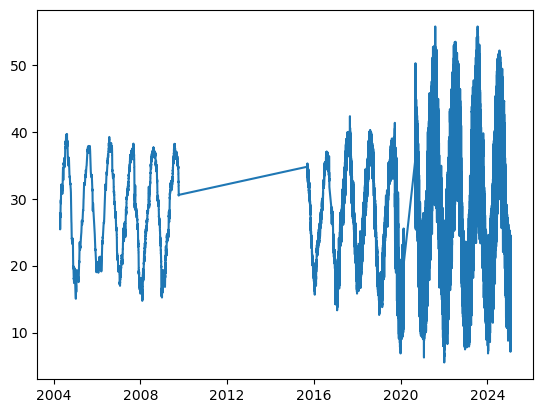

In [28]:
SC_temp_df = pd.read_csv('../../Data/Southern_San_Andreas_Fault/Raw/SC_Temp.csv')
SC_temp_df_1 = pd.DataFrame({'Date':pd.to_datetime(SC_temp_df['SC30day'],dayfirst=True),'degC':SC_temp_df['SCEWdeg']})
SC_temp_df_1.dropna(inplace=True)
SC_temp_df_2 = pd.DataFrame({'Date':pd.to_datetime(SC_temp_df['SCday1'],dayfirst=True),'degC':SC_temp_df['Temperature']})
SC_temp_df_2.dropna(inplace=True)
SC_temp_df_3 = pd.DataFrame({'Date':pd.to_datetime(SC_temp_df['SCreekday1'],dayfirst=True),'degC':SC_temp_df['SCdeg1']})
SC_temp_df_3.dropna(inplace=True)
SC_temp_df_4 = pd.DataFrame({'Date':pd.to_datetime(SC_temp_df['SCday'],dayfirst=True),'degC':SC_temp_df['SCdegC']})
SC_temp_df_4.dropna(inplace=True)

SC_temp_combi = pd.concat([SC_temp_df_1,SC_temp_df_2,SC_temp_df_3,SC_temp_df_4])
SC_temp_combi.sort_values(by='Date',inplace=True)
SC_temp_combi.reset_index(inplace=True, drop=True)
SC_temp_combi.to_csv('../../Data/DATA_tidied/CSV/Temperature/SaltCreek_Temp.csv')

plt.figure()
plt.plot(SC_temp_combi['Date'],SC_temp_combi['degC'])
plt.show()

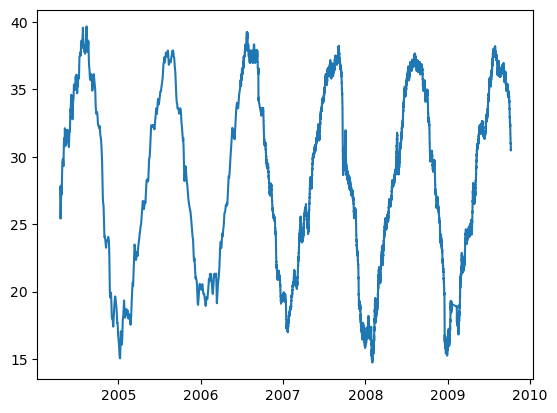

In [29]:
plt.figure()
plt.plot(SC_temp_df_4['Date'],SC_temp_df_4['degC'])
plt.show()

In [30]:
SC_obl_df = pd.read_csv('../../Data/Southern_San_Andreas_Fault/Raw/SC_oblique_30.csv')
SC_obl_df['o30'] = SC_obl_df['o30']+7.75839
SC_obl_df['SC30mm'] = SC_obl_df['SC30mm']-26.6897
SC_obl_df['\'SCmm(corrected)_L\''] = SC_obl_df['\'SCmm(corrected)_L\'']-11.8845
SC_obl_df['SCoblique1'] = (SC_obl_df['SCoblique1']*0.769231)+3.23225


SC_obl_df_1 = pd.DataFrame({'Date':pd.to_datetime(SC_obl_df['SCreekday1'],dayfirst=True),'Slip':SC_obl_df['SCoblique1']})
SC_obl_df_1.dropna(inplace=True)
SC_obl_df_2 = pd.DataFrame({'Date':pd.to_datetime(SC_obl_df['SC30day'],dayfirst=True),'Slip':SC_obl_df['SC30mm']})
SC_obl_df_2.dropna(inplace=True)
SC_obl_df_3 = pd.DataFrame({'Date':pd.to_datetime(SC_obl_df['SCday_L'],dayfirst=True),'Slip':SC_obl_df['\'SCmm(corrected)_L\'']})
SC_obl_df_3.dropna(inplace=True)
SC_obl_df_4 = pd.DataFrame({'Date':pd.to_datetime(SC_obl_df['SCday1'],dayfirst=True),'Slip':SC_obl_df['o30']})
SC_obl_df_4.dropna(inplace=True)

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_84897/40409135.py:1: DtypeWarning: Columns (2,4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  SC_obl_df = pd.read_csv('../../Data/Southern_San_Andreas_Fault/Raw/SC_oblique_30.csv')
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_84897/40409135.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  SC_obl_df_1 = pd.DataFrame({'Date':pd.to_datetime(SC_obl_df['SCreekday1'],dayfirst=True),'Slip':SC_obl_df['SCoblique1']})
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_84897/40409135.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  SC_obl_df_2 = pd.DataFrame({'Date':pd.to_datetime(SC_obl_df['SC30day'],d

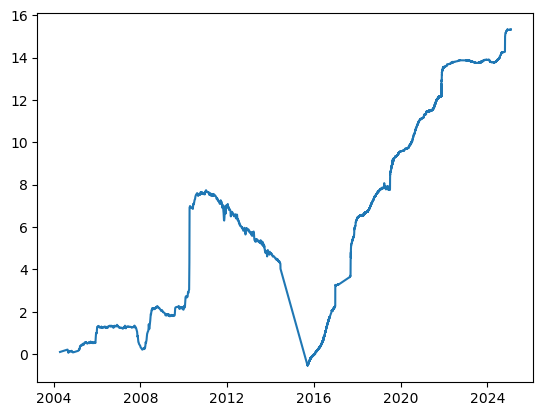

In [31]:
SC_obl_combi = pd.concat([SC_obl_df_1,SC_obl_df_2,SC_obl_df_3,SC_obl_df_4])
SC_obl_combi.sort_values(by='Date',inplace=True)
SC_obl_combi.reset_index(inplace=True, drop=True)
SC_obl_combi.to_csv('../../Data/DATA_tidied/CSV/sc30.csv')

plt.figure()
plt.plot(SC_obl_combi['Date'],SC_obl_combi['Slip'])
plt.show()

In [35]:
SC_ortho_df = pd.read_csv('../../Data/Southern_San_Andreas_Fault/Raw/SC_ortho_76.csv')
SC_ortho_df['o76'] = SC_ortho_df['o76']+4.11997
SC_ortho_df['SCnorml'] = SC_ortho_df['SCnorml']+4.0029
SC_ort_df_1 = pd.DataFrame({'Date':pd.to_datetime(SC_ortho_df['SCreekday'],dayfirst=True),'Ortho':SC_ortho_df['SCnorml']})
SC_ort_df_1.dropna(inplace=True)
SC_ort_df_2 = pd.DataFrame({'Date':pd.to_datetime(SC_ortho_df['SCday1'],dayfirst=True),'Ortho':SC_ortho_df['o76']})
SC_ort_df_2.dropna(inplace=True)

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_84897/3499128035.py:1: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  SC_ortho_df = pd.read_csv('../../Data/Southern_San_Andreas_Fault/Raw/SC_ortho_76.csv')
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_84897/3499128035.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  SC_ort_df_1 = pd.DataFrame({'Date':pd.to_datetime(SC_ortho_df['SCreekday'],dayfirst=True),'Ortho':SC_ortho_df['SCnorml']})
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_84897/3499128035.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  SC_ort_df_2 = pd.DataFrame({'Date':pd.to_datetime(SC_ortho_df['SCday

In [36]:
SC_ort_combi = pd.concat([SC_ort_df_1,SC_ort_df_2])
SC_ort_combi.sort_values(by='Date',inplace=True)
SC_ort_combi.reset_index(inplace=True, drop=True)
SC_ort_combi.to_csv('../../Data/DATA_tidied/CSV/Orthogonal/SaltCreek_Orthogonal.csv')

plt.figure()
plt.plot(SC_ort_combi['Date'],SC_ort_combi['Slip'])
plt.show()

KeyError: 'Slip'

<Figure size 640x480 with 0 Axes>